In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv('homeprices(mulreg).csv')

In [4]:
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
# 1st Step
# check for missing values
data.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [12]:
# use avg,median,mode,round,ceil,floor to fill the nan value
med=data.bedrooms.median()
data['bedrooms']=data['bedrooms'].fillna(med)

In [11]:
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


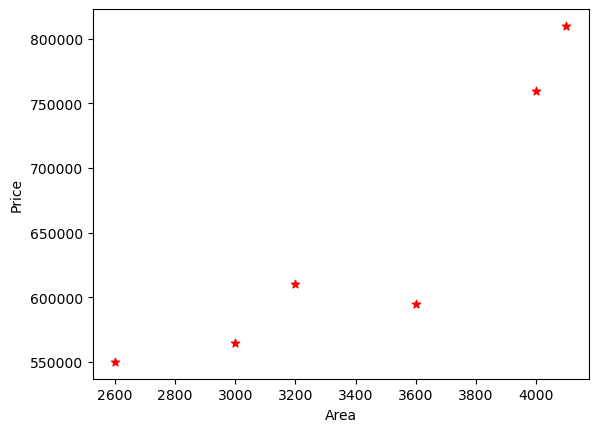

In [13]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(data.area,data.price,color='red',marker='*')

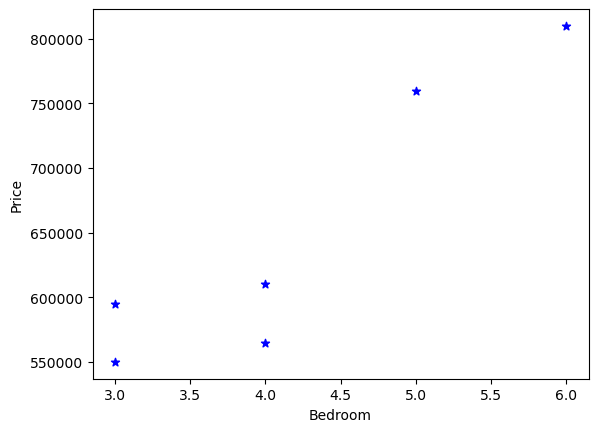

In [17]:
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.scatter(data.bedrooms,data.price,color='blue',marker='*')

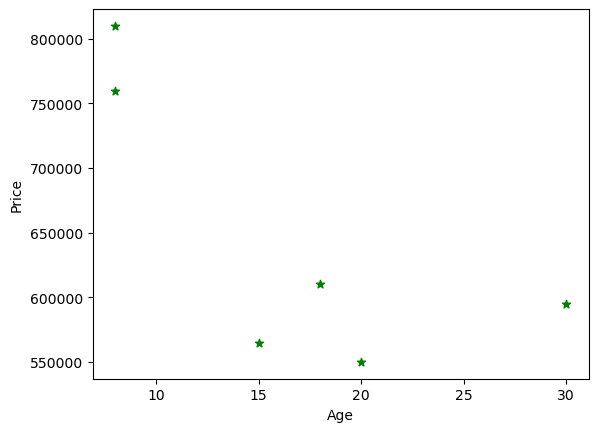

In [16]:
plt.xlabel('Age')
plt.ylabel('Price')
plt.scatter(data.age,data.price,color='green',marker='*')

In [18]:
# finding correlation
correlation=data.corr()
correlation

,area,bedrooms,age,price
area,1.000000,0.751710,-0.445300,0.901476
bedrooms,0.751710,1.000000,-0.877221,0.919803
age,-0.445300,-0.877221,1.000000,-0.734167
price,0.901476,0.919803,-0.734167,1.000000


<Axes: >

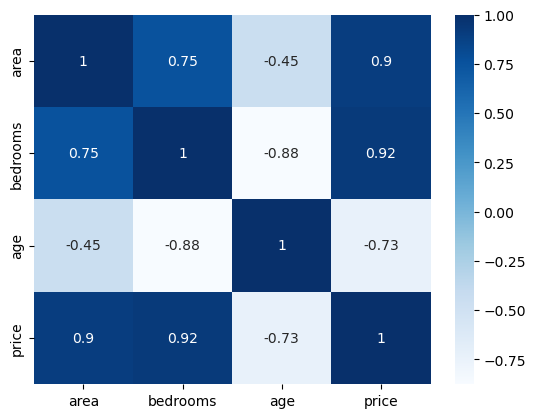

In [19]:
sns.heatmap(correlation,annot=True,cmap='Blues')

In [20]:
x=data.drop('price',axis=1)
y=data['price']

In [21]:
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [22]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [23]:
model=LinearRegression()

In [26]:
# training data
model.fit(x,y)

LinearRegression()

In [27]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [28]:
model.intercept_

221323.00186540408

In [29]:
# predicted y values
y_pred=model.predict(x)

In [30]:
pd.DataFrame({'True y values':y,'Predicted y values':y_pred})

,True y values,Predicted y values
0,550000,518217.632976
1,565000,602590.079374
2,610000,615307.414037
3,595000,597962.895832
4,760000,760663.426755
5,810000,795258.551027


In [33]:
model.predict([[4000,3,10]])

C:\Users\Amjad\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([707422.23078143])

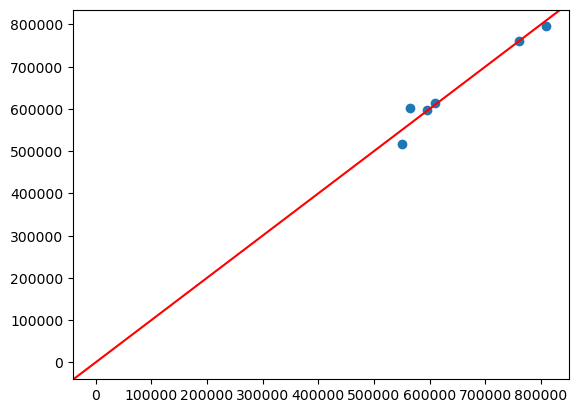

In [39]:
plt.axline([0,0],[1,1],c='red')
plt.scatter(y,y_pred)


### Finding the score of the model
#### r2score=1-error

In [40]:
model.score(x,y)  #r2 score (the goal is to increase the model score)

0.9550196399325818

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(y,y_pred)

446305128.22449446

### Saving the model

In [43]:
# Method 1
import pickle

In [44]:
with open('reg_pickle','wb') as f:
    pickle.dump(model,f)

In [45]:
with open('reg_pickle','rb') as s:
    reg_loaded=pickle.load(s)

In [49]:
reg_loaded.predict([[4000,3,10]])

C:\Users\Amjad\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([707422.23078143])

In [47]:
# Method 2
import joblib
joblib.dump(model,'joblib model')
joblib_reloaded=joblib.load('joblib model')

In [48]:
joblib_reloaded.predict([[4000,3,10]])

C:\Users\Amjad\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([707422.23078143])